In [2]:
print(__doc__)

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Automatically created module for IPython interactive environment


In [3]:
# READ DATA INTO A PANDAS DATAFRAME
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None)
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data.columns = colnames

# ASSIGN A NUMBER TO EACH UNIQUE SPECIES. WILL USE THESE NUMBERS INSTEAD OF NAMES.
data['Species'] = data['species'].map( {'Iris-setosa': 0, 
                                        'Iris-versicolor': 1, 
                                        'Iris-virginica': 2} ).astype(int)

# SETUP AS A FUNCTION

In [4]:
def plot_iris_meshgrid(**kwargs):
    X, y, xcol, ycol, n_neighbors, weights, h = [kwargs[key] for key in kwargs.keys()]
    try:
        plt.clf()
    except:
        pass
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X,y)

    # xaxis will be first column. yaxis will be second column.
    xmin = X.loc[:, xcol].min()-1
    xmax = X.loc[:, xcol].max()+1
    ymin = X.loc[:, ycol].min()-1
    ymax = X.loc[:, ycol].max()+1


    xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                         np.arange(ymin, ymax, h))


    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # .ravel() is the same as .flatten()

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(9,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.loc[:, xcol],    # xdata
                X.loc[:, ycol],    # ydata
                c=y, cmap=cmap_bold,
                edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('%s'%xcol, fontsize=18)
    plt.ylabel('%s'%ycol, fontsize=18)
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


<Figure size 432x288 with 0 Axes>

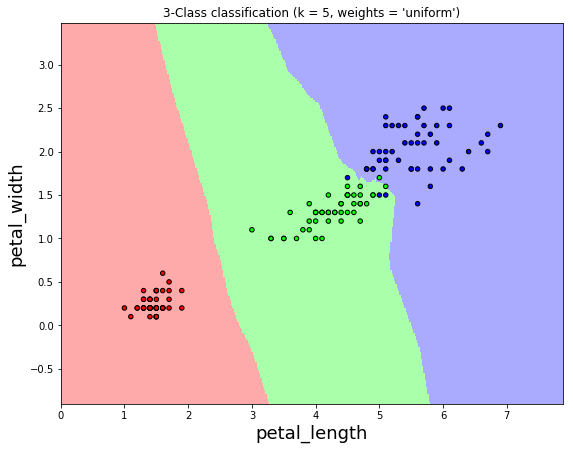

In [7]:
# weight options: 'distance' or 'uniform'
xcol = 'petal_length'
ycol = 'petal_width'


pars = {'X':            data.loc[:, [xcol, ycol]],   # [xcol, ycol]
        'y':            data.Species, 
        'xcol':         xcol, 
        'ycol':         ycol, 
        'n_neighbors':  5, 
        'weights':      'uniform', #'distance', 
        'h':            0.02}


plot_iris_meshgrid(**pars)

## [Their Version](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)

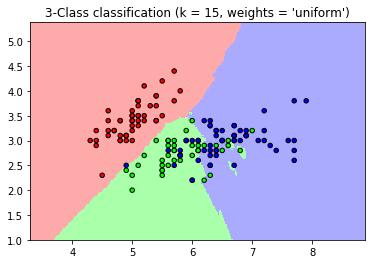

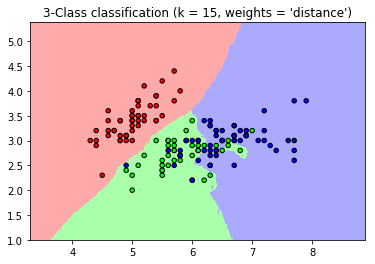

In [8]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
